In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qbc.learners import QBag
from qbc import util
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

For this example, we'll be using the easy datasets that come with sklearn. Let's go ahead and import them.

In [2]:
X, y = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

Now, let's do an example with a set number of allowed samples (5), fit a QBag model, and inspect the resulting confusion matrix.

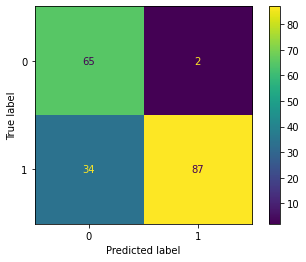

In [3]:
qbag = QBag(MultinomialNB)
qbag.fit(X_train, y_train, allowed_samples = 5)
y_pred = qbag.predict(X_test)
ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred)

Note that this is a _really_ easy dataset, and we appear to get decent performance with only 5 samples allowed to be chosen by the active learning algorithum (QBag). 

Now, let's see how allowing more samples changes the result. The `qbc.util` module provides two training/visualization functions that loop through a range of variables $[2, N)$, where $N$ is the maximum number of samples.

In [4]:
metrics, n_sample_query = util.test_models(X, y, max_samples = 15,model = MultinomialNB,
                                           dtype = 'discrete')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:15<00:00,  1.17s/it]


Results can be shown below.

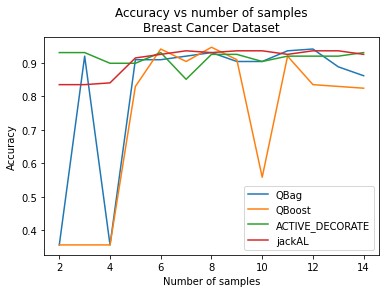

In [5]:
util.plot_models(metrics, n_sample_query, dataset_name = 'Breast Cancer', dtype = 'discrete')

Again, since this is a really easy dataset, all models converge quickly. An interesting trend is that `QBag` and `QBoost` both tend to fluctuate, whereas `JackAL` and `ACTIVE_DECORATE` are more stable. This is very sensible: `QBag` and `QBoost` depend on random sampling of the dataset, whereas `JackAL`'s samples are simply all leave-one-out permutations of the dataset, which is deterministic.`ACTIVE_DECORATE` benefits from generated synthetic data drawn from a uniform or Gaussian distribution, either of which will produce less extreme examples. 

Let's try a problem that is continuous. Although these algorithums were originally designed for classification, I've adapted some of them to regression by using mean squared error as a disagreement function. As of now (0.0.1), I've yet to adapt `ACTIVE_DECORATE`, but the other three all work

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

X, y = fetch_california_housing(return_X_y = True)
# be sure to specify the dtype!!
metrics, n_sample_query = util.test_models(X, y, max_samples = 10,
                                step =1, model = LinearRegression, dtype = 'cont')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.52it/s]


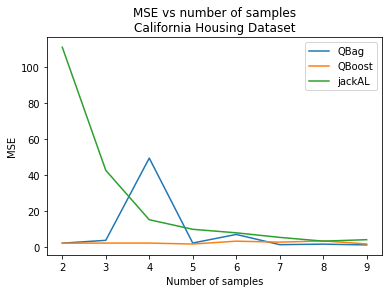

In [10]:
util.plot_models(metrics, n_sample_query, dataset_name = 'California Housing', dtype = 'cont')